<a href="https://colab.research.google.com/github/archangel2006/Machine-Learning-Models/blob/main/Student%20Habit%20%26%20Exam%20Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Habit & Exam Performance

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df=pd.read_csv('/content/student_habits_performance.csv')

# DATA EXPLORATION

In [102]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [103]:
df.sample(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
185,S1185,21,Female,1.3,3.8,3.6,Yes,80.6,6.7,Fair,5,Bachelor,Good,5,No,40.4
394,S1394,19,Female,3.2,1.5,0.0,No,79.6,8.1,Good,5,Bachelor,Good,10,No,92.0
969,S1969,19,Female,4.6,2.0,3.6,Yes,81.1,6.8,Fair,5,Bachelor,Average,4,No,83.0
615,S1615,19,Female,1.5,2.2,2.3,No,89.1,7.9,Fair,0,Bachelor,Average,1,No,43.7
983,S1983,21,Male,3.9,1.8,2.1,No,74.0,6.5,Poor,2,Master,Average,2,No,64.4


In [104]:
df.shape

(1000, 16)

In [105]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [107]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [108]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [109]:
df['parental_education_level'].isnull().sum()

np.int64(91)

In [110]:
df.duplicated().sum()

np.int64(0)

In [111]:
df.corr(numeric_only=True)

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
age,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
study_hours_per_day,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
social_media_hours,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
netflix_hours,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
attendance_percentage,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
sleep_hours,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
exercise_frequency,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
mental_health_rating,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
exam_score,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


# DATA CLEANING

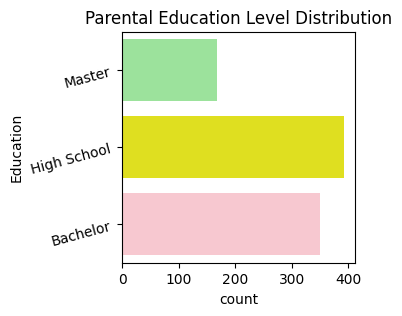

In [112]:
# Seeing Count Of Parental Education Level

plt.figure(figsize=(3,3))
sns.countplot(y='parental_education_level',hue='parental_education_level',data=df,palette=['lightgreen','yellow','pink'],legend=False)
plt.title("Parental Education Level Distribution")
plt.ylabel('Education')
plt.yticks(rotation=15)
plt.show()

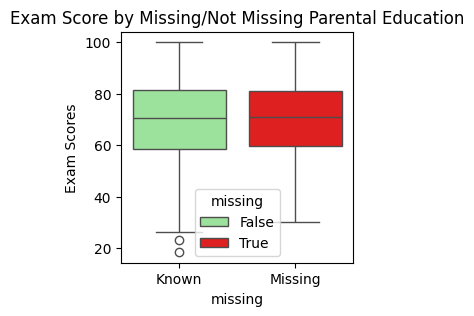

In [113]:
# Plotting Boxplot to Compare Exam Scores Of Students Based On Parental Education

plt.figure(figsize=(3,3))
df['missing']=df['parental_education_level'].isnull()
sns.boxplot(x='missing',y='exam_score',data=df,hue='missing', palette=['lightgreen','red'])
plt.title("Exam Score by Missing/Not Missing Parental Education")
plt.ylabel('Exam Scores')
plt.xticks([False,True],['Known','Missing'])
plt.show()


#The median is almost the same for both groups.
# The spread (IQR, whiskers) is very similar too.
# A few outliers are present.
# No significant difference in score distributions between Known & Unknown



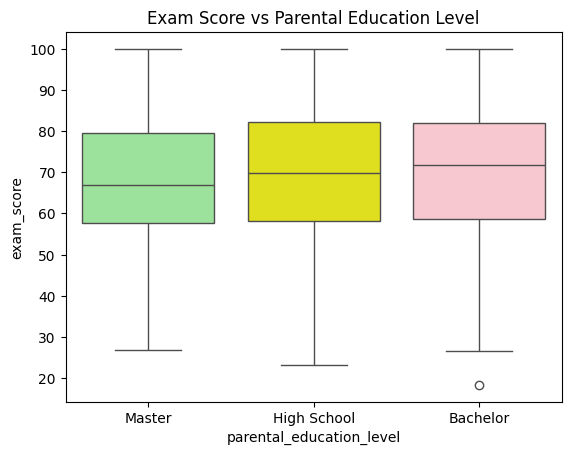

In [114]:
# Influence Of Parental Education Level On Student Performance

sns.boxplot(x='parental_education_level',y='exam_score',hue='parental_education_level',data=df,palette=['lightgreen','yellow','pink'],legend=False)
plt.title("Exam Score vs Parental Education Level")
plt.show()


**Median**

*  Students whose parents are Bachelor have the highest median score.
*  Students whose parents have High School education level is slightly lower.
*  Students with parents who did Master is the lowest among the three.

**Interquartile Range (IQR)**
*   All 3 have similar spread
*   Suggests similar variability in scores.

**Whiskers and Outliers**
*  Few students scored very low despite high parental education.



 **INTERPRETATION: There’s no strong or consistent trend that students with parents having higher education (e.g., Master’s) always perform better.**


The parental_education_level column contains 91 missing values and shows no strong or consistent relationship with student performance based on visual analysis. Since this dataset focuses on analyzing how student habits affect academic outcomes (exam scores), and not background factors, this column is not essential, we can safely chose to drop it to maintain a clean, habit-focused dataset.

In [115]:
df=df.drop('parental_education_level',axis=1)
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score', 'missing'],
      dtype='object')

# DATA VISUALIZATION

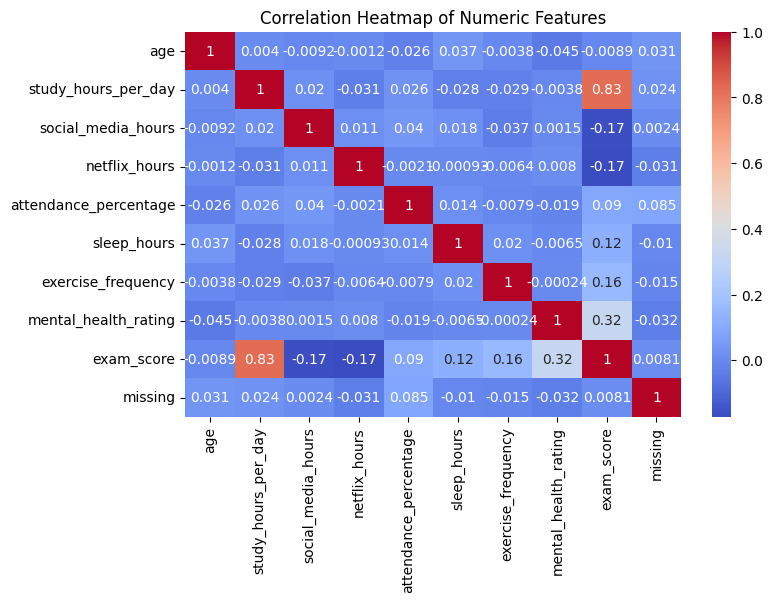

In [116]:
# Correlation Between Numeric Features

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

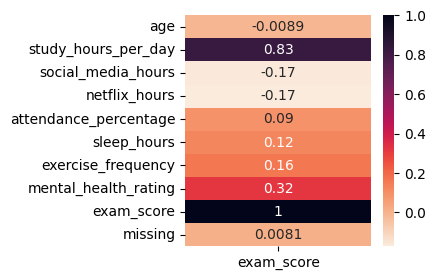

In [117]:
plt.figure(figsize=(3,3))
sns.heatmap(df.corr(numeric_only=True)[['exam_score']],annot=True,cmap='rocket_r')
plt.show()


*   Study Hours shows a strong positive correlation with Exam Scores.
*   Social Media & Netflix Hours show negative correlations with Exam Scores.
*   Exam Scores is positvely correlated with Mental Health.
*   Exercise Frequency & SLeep Hours are mildly positively correlated to Student PErformance in Exam.


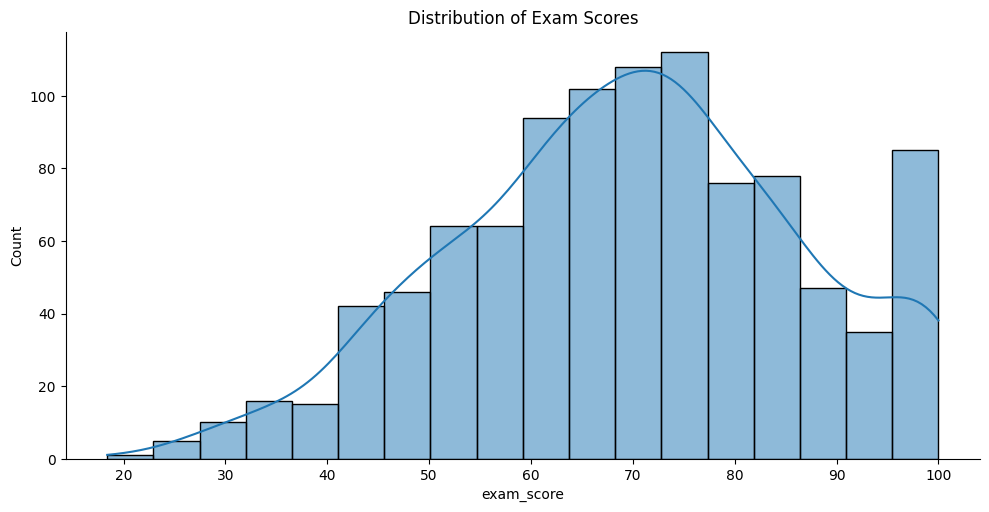

In [118]:
# Distribution OF EXam Scores

sns.displot(df['exam_score'], kde=True, height=5,aspect=2)
plt.title("Distribution of Exam Scores")
plt.show()

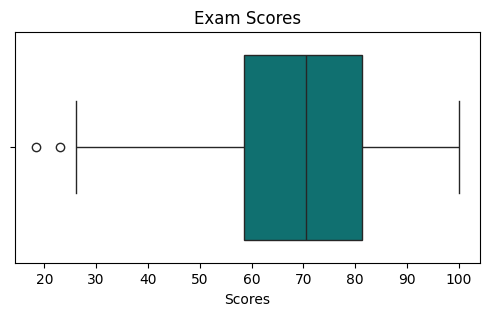

In [119]:
plt.figure(figsize=(6,3))
sns.boxplot(x='exam_score',data=df,color='teal')
plt.title('Exam Scores')
plt.xlabel('Scores')
plt.show()

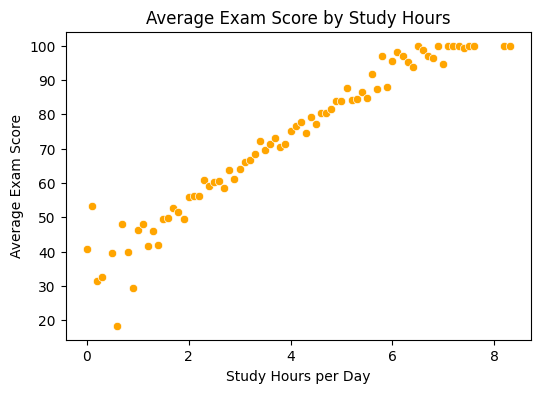

In [120]:
plt.figure(figsize=(6,4))
avg_scores=df.groupby('study_hours_per_day')['exam_score'].mean().reset_index()
sns.scatterplot(x='study_hours_per_day',y='exam_score',data=avg_scores,color='orange')
plt.title("Average Exam Score by Study Hours")
plt.xlabel("Study Hours per Day")
plt.ylabel("Average Exam Score")
plt.show()

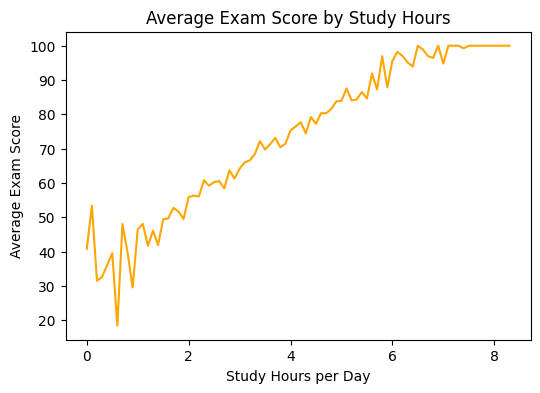

In [121]:
plt.figure(figsize=(6,4))
avg_scores=df.groupby('study_hours_per_day')['exam_score'].mean().reset_index()
sns.lineplot(x='study_hours_per_day',y='exam_score',data=avg_scores,color='orange')
plt.title("Average Exam Score by Study Hours")
plt.xlabel("Study Hours per Day")
plt.ylabel("Average Exam Score")
plt.show()

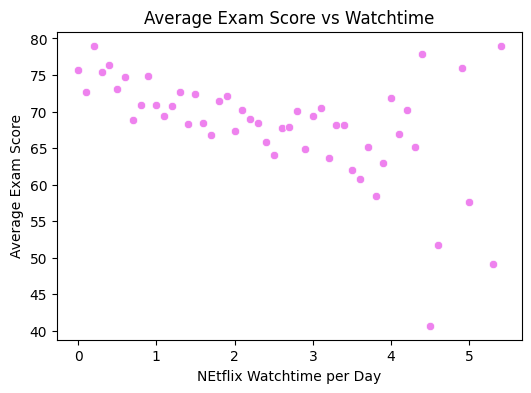

In [122]:
plt.figure(figsize=(6,4))
avg_watchtime=df.groupby('netflix_hours')['exam_score'].mean().reset_index()
sns.scatterplot(x='netflix_hours',y='exam_score',data=avg_watchtime,color='violet')
plt.title("Average Exam Score vs Watchtime")
plt.xlabel("NEtflix Watchtime per Day")
plt.ylabel("Average Exam Score")
plt.show()

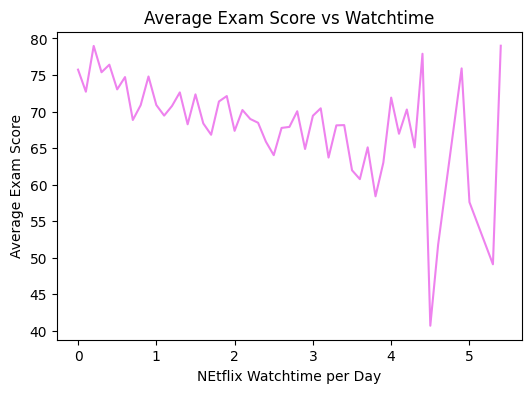

In [123]:
plt.figure(figsize=(6,4))
avg_watchtime=df.groupby('netflix_hours')['exam_score'].mean().reset_index()
sns.lineplot(x='netflix_hours',y='exam_score',data=avg_watchtime,color='violet')
plt.title("Average Exam Score vs Watchtime")
plt.xlabel("NEtflix Watchtime per Day")
plt.ylabel("Average Exam Score")
plt.show()

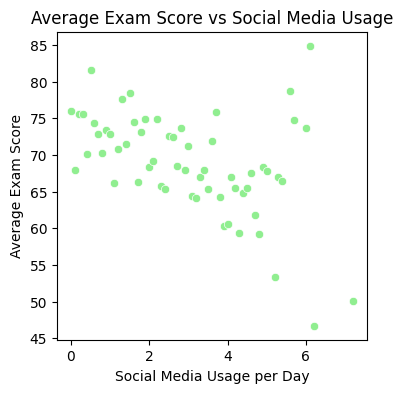

In [124]:
plt.figure(figsize=(4,4))
avg_usage=df.groupby('social_media_hours')['exam_score'].mean().reset_index()
sns.scatterplot(x='social_media_hours', y='exam_score', data=avg_usage,color='lightgreen')
plt.title("Average Exam Score vs Social Media Usage")
plt.xlabel("Social Media Usage per Day")
plt.ylabel("Average Exam Score")
plt.show()


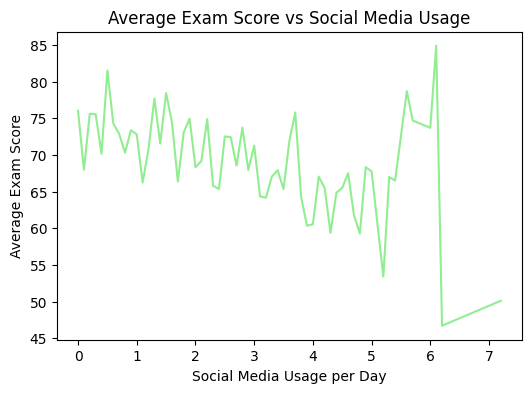

In [125]:
plt.figure(figsize=(6,4))
avg_usage=df.groupby('social_media_hours')['exam_score'].mean().reset_index()
sns.lineplot(x='social_media_hours', y='exam_score', data=avg_usage,color='lightgreen')
plt.title("Average Exam Score vs Social Media Usage")
plt.xlabel("Social Media Usage per Day")
plt.ylabel("Average Exam Score")
plt.show()


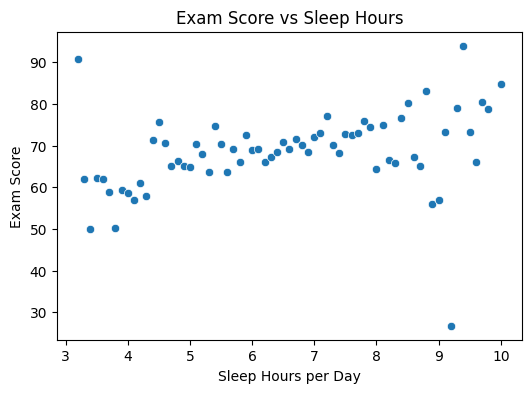

In [126]:
plt.figure(figsize=(6,4))
avg_sleep=df.groupby('sleep_hours')['exam_score'].mean().reset_index()
sns.scatterplot(x='sleep_hours', y='exam_score', data=avg_sleep)
plt.title("Exam Score vs Sleep Hours")
plt.xlabel("Sleep Hours per Day")
plt.ylabel("Exam Score")
plt.show()


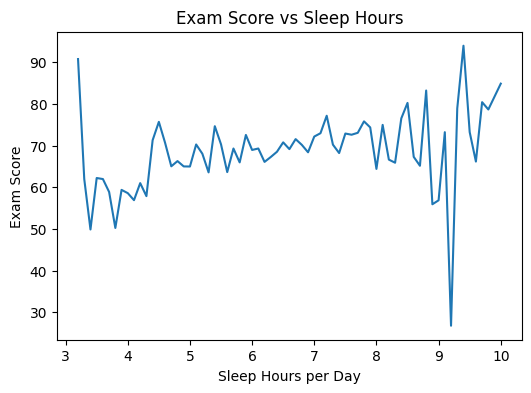

In [127]:
plt.figure(figsize=(6,4))
avg_sleep=df.groupby('sleep_hours')['exam_score'].mean().reset_index()
sns.lineplot(x='sleep_hours', y='exam_score', data=avg_sleep)
plt.title("Exam Score vs Sleep Hours")
plt.xlabel("Sleep Hours per Day")
plt.ylabel("Exam Score")
plt.show()


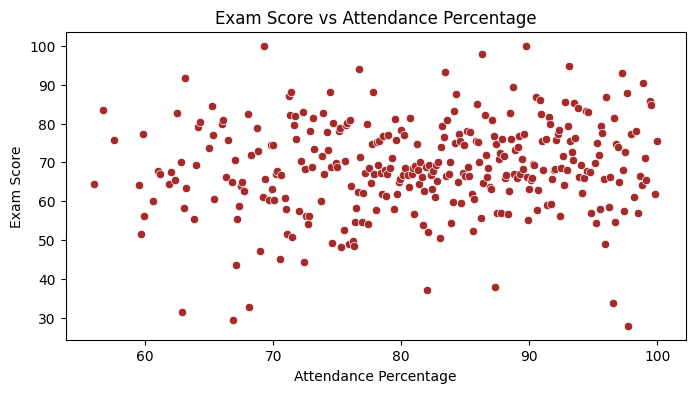

In [128]:
plt.figure(figsize=(8,4))
avg_attendance=df.groupby('attendance_percentage')['exam_score'].mean().reset_index()
sns.scatterplot(x='attendance_percentage', y='exam_score', data=avg_attendance,color='brown')
plt.title("Exam Score vs Attendance Percentage")
plt.xlabel("Attendance Percentage")
plt.ylabel("Exam Score")
plt.show()


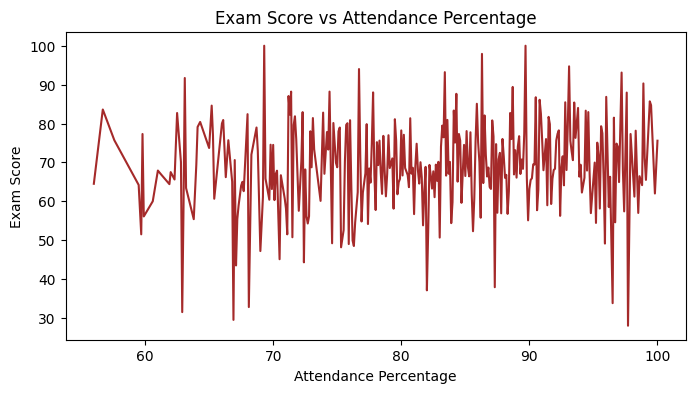

In [129]:
plt.figure(figsize=(8,4))
avg_attendance=df.groupby('attendance_percentage')['exam_score'].mean().reset_index()
sns.lineplot(x='attendance_percentage', y='exam_score', data=avg_attendance,color='brown')
plt.title("Exam Score vs Attendance Percentage")
plt.xlabel("Attendance Percentage")
plt.ylabel("Exam Score")
plt.show()


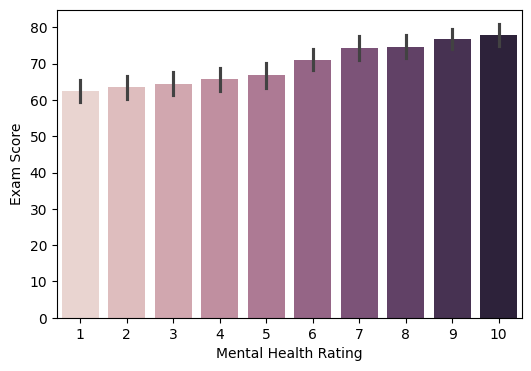

In [130]:
# Mental Health Rating Effect on Exam Scores

plt.figure(figsize=(6,4))
sns.barplot(x='mental_health_rating',y='exam_score',data=df,hue='mental_health_rating',legend=False)
plt.xlabel('Mental Health Rating')
plt.ylabel('Exam Score')
plt.show()

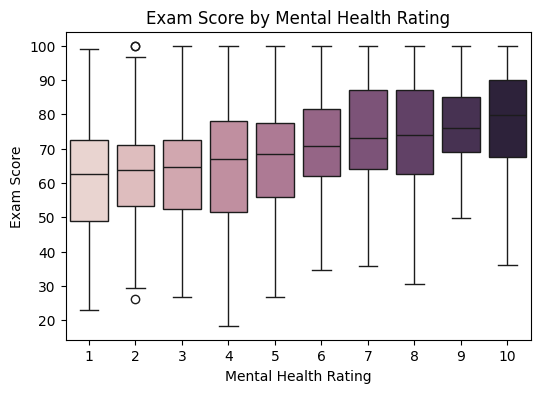

In [131]:
# Spread Of Scores For Different Meantal Health Reatings

plt.figure(figsize=(6,4))
sns.boxplot(x='mental_health_rating', y='exam_score', data=df,hue='mental_health_rating',legend=False)
plt.title("Exam Score by Mental Health Rating")
plt.xlabel("Mental Health Rating")
plt.ylabel("Exam Score")
plt.show()


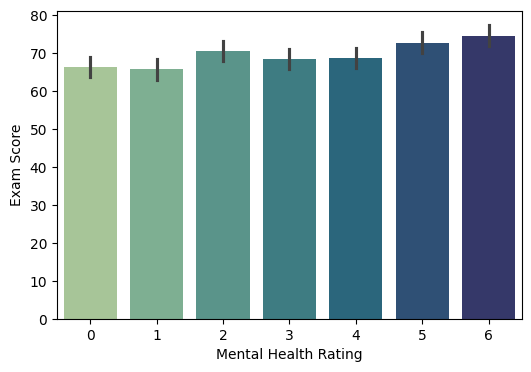

In [142]:
# Exercise Frequency Effect on Exam Scores

plt.figure(figsize=(6,4))
sns.barplot(x='exercise_frequency',y='exam_score',data=df,hue='exercise_frequency',palette='crest',legend=False)
plt.xlabel('Mental Health Rating')
plt.ylabel('Exam Score')
plt.show()

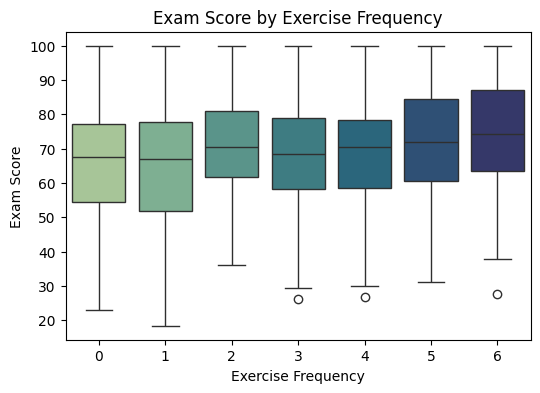

In [133]:
# Spread Of Scores For Different Exercise Frequency

plt.figure(figsize=(6,4))
sns.boxplot(x='exercise_frequency',y='exam_score',data=df,hue='exercise_frequency',palette='crest', legend=False)
plt.title("Exam Score by Exercise Frequency")
plt.xlabel("Exercise Frequency")
plt.ylabel("Exam Score")
plt.show()

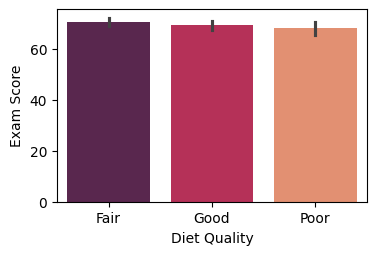

In [134]:
# Diet Quality Effect on Exam Scores

plt.figure(figsize=(4,2.5))
sns.barplot(x='diet_quality',y='exam_score',data=df,hue='diet_quality',palette='rocket',legend=False)
plt.xlabel('Diet Quality')
plt.ylabel('Exam Score')
plt.show()

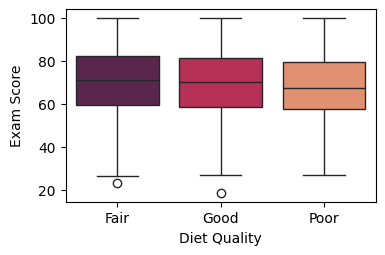

In [135]:
# Spread Of Score Based On Diet Quality

plt.figure(figsize=(4,2.5))
sns.boxplot(x='diet_quality',y='exam_score',data=df,hue='diet_quality',palette='rocket',legend=False)
plt.xlabel('Diet Quality')
plt.ylabel('Exam Score')
plt.show()


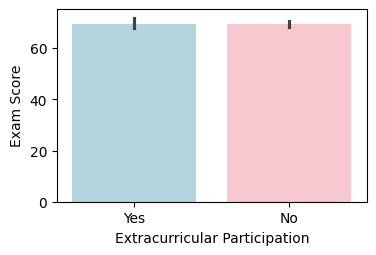

In [136]:
# EXtracurricular Participation Effect On Exam Scores

plt.figure(figsize=(4,2.5))
sns.barplot(x='extracurricular_participation',y='exam_score',data=df,hue='extracurricular_participation',palette=['lightblue','pink'],legend=False)
plt.xlabel('Extracurricular Participation')
plt.ylabel('Exam Score')
plt.show()

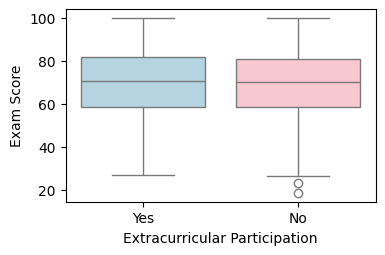

In [137]:
# Spread Of Score BAsed On EXtracurricular Participation

plt.figure(figsize=(4,2.5))
sns.boxplot(x='extracurricular_participation',y='exam_score',data=df,hue='extracurricular_participation',palette=['lightblue','pink'],legend=False)
plt.xlabel('Extracurricular Participation')
plt.ylabel('Exam Score')
plt.show()

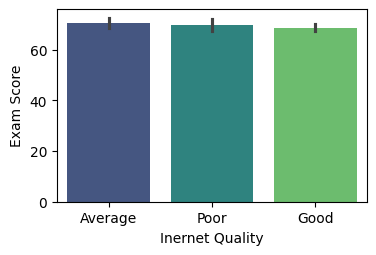

In [138]:
# Internet Quality Effect On Exam Scores

plt.figure(figsize=(4,2.5))
sns.barplot(x='internet_quality',y='exam_score',data=df,hue='internet_quality',palette='viridis',legend=False)
plt.xlabel('Inernet Quality')
plt.ylabel('Exam Score')
plt.show()

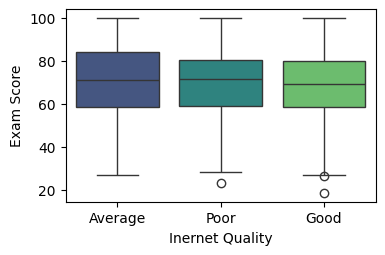

In [139]:
# Spread Of Exam Scores Based On Internet Quality

plt.figure(figsize=(4,2.5))
sns.boxplot(x='internet_quality',y='exam_score',data=df,hue='internet_quality',palette='viridis',legend=False)
plt.xlabel('Inernet Quality')
plt.ylabel('Exam Score')
plt.show()

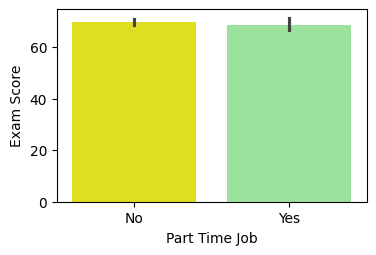

In [140]:
# Effect Of Part TIme Job On Exam Scores

plt.figure(figsize=(4,2.5))
sns.barplot(x='part_time_job',y='exam_score',data=df,hue='part_time_job',palette=['yellow','lightgreen'],legend=False)
plt.xlabel('Part Time Job')
plt.ylabel('Exam Score')
plt.show()

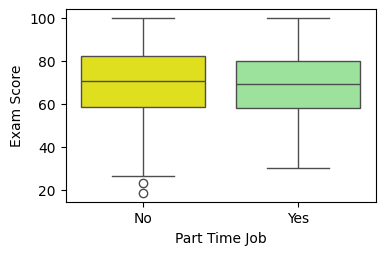

In [141]:
# Exam Scores Based Of Part Time Job

plt.figure(figsize=(4,2.5))
sns.boxplot(x='part_time_job',y='exam_score',data=df,hue='part_time_job',palette=['yellow','lightgreen'],legend=False)
plt.xlabel('Part Time Job')
plt.ylabel('Exam Score')
plt.show()